<a href="https://colab.research.google.com/github/kchabin/swu-ai-secu/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Pillow
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install pandas

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
from google.colab import drive
import os

# Google Drive 마운트
drive.mount('/content/drive')

# 프로젝트 디렉토리 경로 설정 train 이미지, test 이미지

test_image = '/content/drive/MyDrive/AI_SWU_PROJECT/processed_images/test/default_class'

train_labels = pd.read_csv('/content/drive/MyDrive/AI_SWU_PROJECT/trainLabels.csv')



print("완료")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
완료


In [ ]:
train_image = '/content/drive/MyDrive/AI_SWU_PROJECT/trainN/image'

train_images = np.load('/content/drive/MyDrive/AI_SWU_PROJECT/trainN/train_images_n.npy')
#test_images = np.load('/content/drive/MyDrive/AI_SWU_PROJECT/trainN/test_images.npy')

# 데이터셋 소개

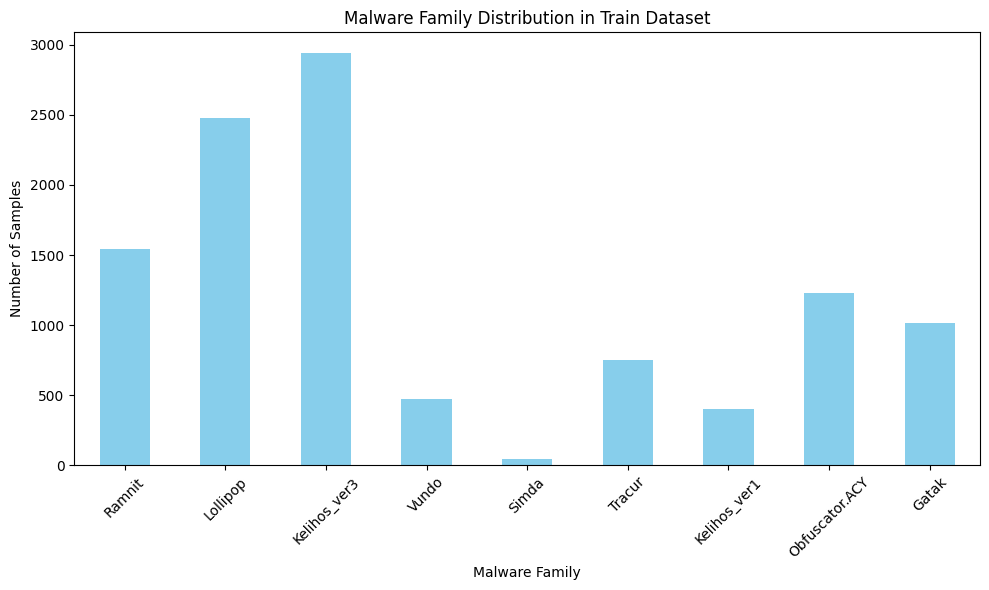

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 클래스별 샘플 개수 세기
class_counts = train_labels['Class'].value_counts().sort_index()

# 악성코드 패밀리 이름 정의
class_names = {
    1: 'Ramnit',
    2: 'Lollipop',
    3: 'Kelihos_ver3',
    4: 'Vundo',
    5: 'Simda',
    6: 'Tracur',
    7: 'Kelihos_ver1',
    8: 'Obfuscator.ACY',
    9: 'Gatak'
}

# 클래스 레이블을 악성코드 패밀리 이름으로 변환
class_counts.index = class_counts.index.map(class_names)

# 시각화
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Malware Family Distribution in Train Dataset')
plt.xlabel('Malware Family')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 모델 정의

- 목표 : train과 train 데이터에 대한 label을 학습한 모델로 test 데이터의 label을 예측하는 악성코드 패밀리 분류 모델을 만든다.

64*64 사이즈의 그레이스케일 이미지를 활용.
- train_images : 10868개
- test_images : 10873개
- train_labels : train 데이터에 대한 label. 각 train 이미지가 어떤 악성코드 패밀리에 속하는지 표현됨.



# 모델 훈련 및 평가

- Random Forest
- Gradient Boosting
- XGBoost
- LightGBM

4가지 모델을 학습 및 훈련, 평가 결과 비교
최종적으로 label이 없는 test_image 데이터에 대해서 예측한 결과를 서로 비교하고 최적의 이미지 기반 악성코드 패밀리 분류 머신러닝 모델을 탐색하고자 함.

결과 지표 해석
- `precision` : 정밀도. 악성코드로 예측된 파일 중 실제로 악성코드인 비율.
- `Recall` : 재현율. 실제 악성코드 중 모델이 탐지한 비율.
- `F1-score` :  Precision과 Recall 사이의 균형을 평가.
특정 클래스에서 Precision과 Recall 중 하나가 극단적으로 낮을 때 보완 지표로 사용.
- `Support` : 각 데이터 샘플 개수
- `Accuracy` : 모델 정확도. 클래스 불균형이 심하면 신뢰하기 어려울 수 있음.
- `Macro Avg` : 각 클래스의 Precision, Recall, F1-Score를 개별적으로 계산한 뒤, 평균을 냄, 클래스 불균형에 민감하며, 모든 클래스를 동등하게 취급.
- `Weighted Avg` : 클래스 불균형을 완화해, Precision, Recall, F1-Score를 클래스별 데이터 샘플 개수로 가중평균

## 랜덤포레스트 모델

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import time

# 훈련 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels['Class'], test_size=0.2, random_state=42)

start_time = time.time()

# 랜덤포레스트 모델 훈련
print("모델 훈련 중")
rf = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced')
scores = cross_validate(rf, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)


print("Train Score:", np.mean(scores['train_score']))
print("Validation Score:", np.mean(scores['test_score']))

rf.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_val_pred = rf.predict(X_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on validation set: {accuracy:.4f}")
print(classification_report(y_val, y_val_pred))

end_time = time.time()
# 전체 훈련 및 예측에 걸린 시간
elapsed_time = end_time - start_time
print(f"총 걸린 시간: {elapsed_time:.4f} 초")


모델 훈련 중
Train Score: 1.0
Validation Score: 0.9615834795204578
Accuracy on validation set: 0.9660
              precision    recall  f1-score   support

           1       0.91      0.98      0.94       314
           2       0.98      0.97      0.97       486
           3       1.00      1.00      1.00       594
           4       0.93      0.97      0.95        87
           5       0.83      0.71      0.77         7
           6       0.93      0.88      0.90       135
           7       1.00      0.99      0.99        87
           8       0.99      0.90      0.94       249
           9       0.95      0.99      0.97       215

    accuracy                           0.97      2174
   macro avg       0.95      0.93      0.94      2174
weighted avg       0.97      0.97      0.97      2174

총 걸린 시간: 31.2199 초


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import time

# 데이터 스케일링
#scaler = StandardScaler()
#train_images_scaled = scaler.fit_transform(train_images)

# PCA로 차원 축소
pca = PCA(n_components=50)
train_pca = pca.fit_transform(train_images)  # 훈련 데이터에 대해 PCA 적용


# 훈련 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_labels['Class'], test_size=0.2, random_state=42)

start_time = time.time()

# 랜덤포레스트 모델 훈련
print("모델 훈련 중")
rf = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced')
scores = cross_validate(rf, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)


print("Train Score:", np.mean(scores['train_score']))
print("Validation Score:", np.mean(scores['test_score']))

rf.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_val_pred = rf.predict(X_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on validation set: {accuracy:.4f}")
print(classification_report(y_val, y_val_pred))

end_time = time.time()
# 전체 훈련 및 예측에 걸린 시간
elapsed_time = end_time - start_time
print(f"총 걸린 시간: {elapsed_time:.4f} 초")


모델 훈련 중
Train Score: 1.0
Validation Score: 0.9535314199197851
Accuracy on validation set: 0.9623
              precision    recall  f1-score   support

           1       0.87      0.98      0.92       314
           2       0.99      0.97      0.98       486
           3       1.00      1.00      1.00       594
           4       0.93      0.93      0.93        87
           5       0.00      0.00      0.00         7
           6       0.96      0.89      0.92       135
           7       0.99      0.98      0.98        87
           8       0.96      0.89      0.92       249
           9       0.98      0.98      0.98       215

    accuracy                           0.96      2174
   macro avg       0.85      0.85      0.85      2174
weighted avg       0.96      0.96      0.96      2174

총 걸린 시간: 5.0620 초


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import time

# 데이터 스케일링
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images)

# PCA로 차원 축소
pca = PCA(n_components=50)
train_pca = pca.fit_transform(train_images_scaled)  # 훈련 데이터에 대해 PCA 적용


# 훈련 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_labels['Class'], test_size=0.2, random_state=42)

start_time = time.time()

# 랜덤포레스트 모델 훈련
print("모델 훈련 중")
rf = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced')
scores = cross_validate(rf, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)


print("Train Score:", np.mean(scores['train_score']))
print("Validation Score:", np.mean(scores['test_score']))

rf.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_val_pred = rf.predict(X_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on validation set: {accuracy:.4f}")
print(classification_report(y_val, y_val_pred))

end_time = time.time()
# 전체 훈련 및 예측에 걸린 시간
elapsed_time = end_time - start_time
print(f"총 걸린 시간: {elapsed_time:.4f} 초")


모델 훈련 중
Train Score: 1.0
Validation Score: 0.9556022369111515
Accuracy on validation set: 0.9660
              precision    recall  f1-score   support

           1       0.88      0.99      0.93       314
           2       0.99      0.97      0.98       486
           3       0.99      1.00      0.99       594
           4       0.98      0.93      0.95        87
           5       0.00      0.00      0.00         7
           6       0.97      0.92      0.94       135
           7       0.99      0.98      0.98        87
           8       0.97      0.90      0.93       249
           9       0.98      0.98      0.98       215

    accuracy                           0.97      2174
   macro avg       0.86      0.85      0.85      2174
weighted avg       0.96      0.97      0.96      2174

총 걸린 시간: 5.1514 초


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1. **PCA와 스케일링을 모두 적용하지 않은 경우** : 모델 성능이 3가지 중 가장 높고, 데이터수가 가장 적은 클래스 5에 대한 지표가 0이 나오지 않음. 대신 모델 훈련 및 예측, 성능 평가까지 걸린 시간이 약 4분으로 가장 길었음.


2. PCA만 적용한 경우 : 클래스 5에 대한 지표가 0이 나옴. 모델 훈련 및 예측, 성능 평가까지 걸린 시간이 33초정도로 빠른 속도를 보임.

3. PCA, 스케일링 모두 적용 : 클래스 5에 대한 지표가 0, 모델 훈련 및 예측, 성능 평가까지 걸린 시간이 39초 정도로 빠른 속도.

결론 : PCA, 스케일링을 적용하면 속도는 빠르지만 모델의 정확도가 낮아짐.
- PCA는 중요한 특성을 잃을 수 있어, 클래스 5 같은 케이스에서 성능 저하가 발생할 수 있음.
- PCA와 스케일링을 동시 적용하면, 중요한 특성을 잃고, 데이터 분포 왜곡 또한 발생할 수 있음 -> 성능 저하 발생

클래스 불균형으로 인한 성능 저하를 n_components 값을 증가시키거나, Grid Search, Random Search, SMOTE 등의 방법으로 해결해보고자 함.

## 성능 향상


### GridSearch(랜덤포레스트)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA


# PCA로 차원 축소
pca = PCA(n_components=50)
train_pca = pca.fit_transform(train_images)  # 훈련 데이터에 대해 PCA 적용

# 훈련 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_pca, train_labels['Class'], test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=42),
                           param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
#그리드서치 결과 기반 최적 모델 훈련
rf_best = grid_search.best_estimator_

# 검증 데이터에 대한 예측
y_val_pred = rf_best.predict(X_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"검증 데이터에 대한 정확도: {accuracy:.4f}")
print(classification_report(y_val, y_val_pred))


검증 데이터에 대한 정확도: 0.9669
              precision    recall  f1-score   support

           1       0.88      0.99      0.93       314
           2       0.99      0.97      0.98       486
           3       1.00      1.00      1.00       594
           4       0.93      0.94      0.94        87
           5       0.50      0.14      0.22         7
           6       0.96      0.91      0.94       135
           7       0.99      0.99      0.99        87
           8       0.96      0.90      0.93       249
           9       0.98      0.99      0.98       215

    accuracy                           0.97      2174
   macro avg       0.91      0.87      0.88      2174
weighted avg       0.97      0.97      0.97      2174



### Random Search(랜덤포레스트)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# PCA로 차원 축소
pca = PCA(n_components=50)
train_pca = pca.fit_transform(train_images)  # 훈련 데이터에 대해 PCA 적용

# 훈련 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_labels['Class'], test_size=0.2, random_state=42)

# 하이퍼파라미터 공간 정의
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 8, 10],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# RandomizedSearchCV로 하이퍼파라미터 튜닝
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, random_state=42)

# 모델 훈련
random_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters: ", random_search.best_params_)

# 최적 모델로 예측
best_rf = random_search.best_estimator_
y_val_pred = best_rf.predict(X_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"검증 데이터에 대한 정확도: {accuracy:.4f}")
print(classification_report(y_val, y_val_pred))


Best parameters:  {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
검증 데이터에 대한 정확도: 0.9522
              precision    recall  f1-score   support

           1       0.83      0.99      0.90       314
           2       0.99      0.96      0.97       486
           3       1.00      1.00      1.00       594
           4       0.94      0.93      0.94        87
           5       0.00      0.00      0.00         7
           6       0.93      0.85      0.89       135
           7       1.00      0.95      0.98        87
           8       0.96      0.87      0.91       249
           9       0.94      0.97      0.95       215

    accuracy                           0.95      2174
   macro avg       0.84      0.83      0.84      2174
weighted avg       0.95      0.95      0.95      2174



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### SMOTE(오버샘플링)
데이터의 개수가 적은 클래스의 표본을 가져온 뒤 임의의 값을 추가하여 새로운 샘플을 만들어 데이터에 추가하는 방식


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels['Class'], test_size=0.2, random_state=42)

# SMOTE 적용
print("Before SMOTE: ", X_train.shape, y_train.shape)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE: ", X_train_resampled.shape, y_train_resampled.shape)

print('SMOTE 적용 후 label 값 분포: \n', pd.Series(y_train_resampled).value_counts())

# 랜덤포레스트 모델 훈련
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_resampled, y_train_resampled)

# 검증 데이터에 대한 예측
y_val_pred = rf.predict(X_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print(classification_report(y_val, y_val_pred))


Before SMOTE:  (8694, 4096) (8694,)
After SMOTE:  (21132, 4096) (21132,)
SMOTE 적용 후 label 값 분포: 
 Class
3    2348
2    2348
1    2348
9    2348
6    2348
8    2348
7    2348
4    2348
5    2348
Name: count, dtype: int64
Validation Accuracy: 0.9706
              precision    recall  f1-score   support

           1       0.92      0.98      0.95       314
           2       0.98      0.97      0.98       486
           3       1.00      1.00      1.00       594
           4       0.92      0.98      0.95        87
           5       0.71      0.71      0.71         7
           6       0.95      0.93      0.94       135
           7       0.99      0.99      0.99        87
           8       1.00      0.90      0.95       249
           9       0.95      0.99      0.97       215

    accuracy                           0.97      2174
   macro avg       0.94      0.94      0.94      2174
weighted avg       0.97      0.97      0.97      2174



### ADASYN


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels['Class'], test_size=0.2, random_state=42)
# 데이터 증대
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# 랜덤포레스트 모델 훈련
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_resampled, y_train_resampled)

# 검증 데이터에 대한 예측
y_val_pred = rf.predict(X_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print(classification_report(y_val, y_val_pred))



Validation Accuracy: 0.9706
              precision    recall  f1-score   support

           1       0.92      0.98      0.95       314
           2       0.98      0.97      0.98       486
           3       1.00      1.00      1.00       594
           4       0.92      0.98      0.95        87
           5       0.71      0.71      0.71         7
           6       0.95      0.93      0.94       135
           7       0.99      0.99      0.99        87
           8       1.00      0.90      0.95       249
           9       0.95      0.99      0.97       215

    accuracy                           0.97      2174
   macro avg       0.94      0.94      0.94      2174
weighted avg       0.97      0.97      0.97      2174



## GradientBoosting


이미지 데이터를 다시 로드하고, 그래디언트 부스팅 모델을 사용해서 분류한 결과
- 클래스 5에 대한 지표들이 0으로 나타나는 문제를 해결하기 위해 사용함.
- 지표가 상승하는 걸 확인함.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_validate


# PCA로 차원 축소
pca = PCA(n_components=50)
train_pca = pca.fit_transform(train_images)  # 훈련 데이터에 대해 PCA 적용

# 데이터 분할 (train_pca와 train_labels는 이미 PCA 처리된 데이터와 레이블)
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_labels['Class'], test_size=0.2, random_state=42)

# 모델 훈련
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
scores = cross_validate(gb, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
gb.fit(X_train, y_train)

print("Train Score:", np.mean(scores['train_score']))
print("Validation Score:", np.mean(scores['test_score']))

# 검증 데이터에 대한 예측
y_val_pred = gb.predict(X_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on validation set: {accuracy:.4f}")
print(classification_report(y_val, y_val_pred))


Train Score: 0.9907407555926149
Validation Score: 0.9446744984585006
Accuracy on validation set: 0.9499
              precision    recall  f1-score   support

           1       0.91      0.94      0.92       314
           2       0.96      0.96      0.96       486
           3       0.99      1.00      1.00       594
           4       0.92      0.89      0.90        87
           5       0.17      0.14      0.15         7
           6       0.84      0.88      0.86       135
           7       0.99      0.94      0.96        87
           8       0.95      0.90      0.92       249
           9       0.95      0.96      0.96       215

    accuracy                           0.95      2174
   macro avg       0.85      0.85      0.85      2174
weighted avg       0.95      0.95      0.95      2174



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_validate


# PCA로 차원 축소
pca = PCA(n_components=100)
train_pca = pca.fit_transform(train_images)  # 훈련 데이터에 대해 PCA 적용

# 데이터 분할 (train_pca와 train_labels는 이미 PCA 처리된 데이터와 레이블)
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_labels['Class'], test_size=0.2, random_state=42)

# 모델 훈련
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
scores = cross_validate(gb, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
gb.fit(X_train, y_train)

print("Train Score:", np.mean(scores['train_score']))
print("Validation Score:", np.mean(scores['test_score']))

# 검증 데이터에 대한 예측
y_val_pred = gb.predict(X_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on validation set: {accuracy:.4f}")
print(classification_report(y_val, y_val_pred))


Train Score: 0.991804705266626
Validation Score: 0.9434096682682732
Accuracy on validation set: 0.9494
              precision    recall  f1-score   support

           1       0.89      0.96      0.92       314
           2       0.98      0.96      0.97       486
           3       1.00      1.00      1.00       594
           4       0.93      0.89      0.91        87
           5       0.33      0.14      0.20         7
           6       0.82      0.86      0.84       135
           7       0.99      0.95      0.97        87
           8       0.94      0.89      0.91       249
           9       0.95      0.96      0.96       215

    accuracy                           0.95      2174
   macro avg       0.87      0.84      0.85      2174
weighted avg       0.95      0.95      0.95      2174



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_validate


# PCA로 차원 축소
pca = PCA(n_components=200)
train_pca = pca.fit_transform(train_images)  # 훈련 데이터에 대해 PCA 적용

# 데이터 분할 (train_pca와 train_labels는 이미 PCA 처리된 데이터와 레이블)
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_labels['Class'], test_size=0.2, random_state=42)

# 모델 훈련
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
scores = cross_validate(gb, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
gb.fit(X_train, y_train)

print("Train Score:", np.mean(scores['train_score']))
print("Validation Score:", np.mean(scores['test_score']))

# 검증 데이터에 대한 예측
y_val_pred = gb.predict(X_val)

# 성능 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on validation set: {accuracy:.4f}")
print(classification_report(y_val, y_val_pred))


Train Score: 0.9924373271201666
Validation Score: 0.9422599128766647
Accuracy on validation set: 0.9494
              precision    recall  f1-score   support

           1       0.89      0.96      0.92       314
           2       0.96      0.97      0.97       486
           3       0.99      1.00      1.00       594
           4       0.92      0.89      0.90        87
           5       0.00      0.00      0.00         7
           6       0.88      0.84      0.86       135
           7       0.99      0.94      0.96        87
           8       0.94      0.88      0.91       249
           9       0.95      0.95      0.95       215

    accuracy                           0.95      2174
   macro avg       0.84      0.83      0.83      2174
weighted avg       0.95      0.95      0.95      2174



적정 차원 크기는 100인 것으로 보임

## XGBoost

그래디언트 부스팅을 개선한 알고리즘인 만큼, 실제 모델의 결과에서도 차이가 있는지 확인해보고자 함.

### 기본 코드

**차원 개수 별 성능 차이 비교**

n_components : 50, 100, 200 으로 나눠서 실습.
- 원래 차원 개수는 4096개

In [ ]:
print(f"trina_images shape: {train_images.shape}")
print(f"train_pca shape: {train_pca.shape}")
print(f"train_labels shape: {train_labels['Class'].shape}")


trina_images shape: (10868, 4096)
train_pca shape: (10868, 100)
train_labels shape: (10868,)


In [ ]:
# 레이블 변환 (0부터 시작)
y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# PCA로 차원 축소
pca = PCA(n_components=50)
train_pca = pca.fit_transform(train_images)  # 훈련 데이터에 대해 PCA 적용


# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_labels['Class'], test_size=0.2, random_state=42)

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, X_train, y_train-1, cv=5, return_train_score=True, n_jobs=-1)
xgb.fit(X_train, y_train-1)

print("Train Score:", np.mean(scores['train_score']))
print("Validation Score:", np.mean(scores['test_score']))

# 검증 데이터 평가
y_val_pred = xgb.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val - 1, y_val_pred))
print(classification_report(y_val - 1, y_val_pred))


Train Score: 1.0
Validation Score: 0.9589371561900514
Validation Accuracy: 0.9673413063477461
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       314
           1       0.99      0.98      0.99       486
           2       0.99      1.00      0.99       594
           3       0.90      0.94      0.92        87
           4       0.50      0.29      0.36         7
           5       0.95      0.91      0.93       135
           6       1.00      0.97      0.98        87
           7       0.95      0.90      0.93       249
           8       0.98      0.99      0.98       215

    accuracy                           0.97      2174
   macro avg       0.91      0.88      0.89      2174
weighted avg       0.97      0.97      0.97      2174



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# PCA로 차원 축소
pca = PCA(n_components=100)
train_pca = pca.fit_transform(train_images)  # 훈련 데이터에 대해 PCA 적용


# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_labels['Class'], test_size=0.2, random_state=42)

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, X_train, y_train-1, cv=5, return_train_score=True, n_jobs=-1)
xgb.fit(X_train, y_train-1)

print("Train Score:", np.mean(scores['train_score']))
print("Validation Score:", np.mean(scores['test_score']))

# 검증 데이터 평가
y_val_pred = xgb.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val - 1, y_val_pred))
print(classification_report(y_val - 1, y_val_pred))


Train Score: 1.0
Validation Score: 0.9567519923027599
Validation Accuracy: 0.9641214351425943
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       314
           1       0.99      0.98      0.98       486
           2       0.99      1.00      0.99       594
           3       0.93      0.94      0.94        87
           4       0.50      0.29      0.36         7
           5       0.92      0.90      0.91       135
           6       0.99      0.98      0.98        87
           7       0.95      0.90      0.92       249
           8       0.98      0.97      0.97       215

    accuracy                           0.96      2174
   macro avg       0.91      0.88      0.89      2174
weighted avg       0.96      0.96      0.96      2174



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA

# PCA로 차원 축소
pca = PCA(n_components=200)
train_pca = pca.fit_transform(train_images)  # 훈련 데이터에 대해 PCA 적용

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_labels['Class'], test_size=0.2, random_state=42)

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, X_train, y_train-1, cv=5, return_train_score=True, n_jobs=-1)
xgb.fit(X_train, y_train-1)

print("Train Score:", np.mean(scores['train_score']))
print("Validation Score:", np.mean(scores['test_score']))

# 검증 데이터 평가
y_val_pred = xgb.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val - 1, y_val_pred))
print(classification_report(y_val - 1, y_val_pred))


Train Score: 1.0
Validation Score: 0.955601641354402
Validation Accuracy: 0.9604415823367065
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       314
           1       0.98      0.97      0.98       486
           2       0.99      1.00      0.99       594
           3       0.91      0.92      0.91        87
           4       0.50      0.14      0.22         7
           5       0.93      0.89      0.91       135
           6       0.99      0.97      0.98        87
           7       0.97      0.90      0.93       249
           8       0.97      0.97      0.97       215

    accuracy                           0.96      2174
   macro avg       0.90      0.86      0.87      2174
weighted avg       0.96      0.96      0.96      2174



In [ ]:
print(train_images.shape)

- max_depth: 트리의 최대 깊이 (과적합 방지)
- learning_rate: 학습률 (작을수록 더 많은 트리가 필요)
- n_estimators: 트리 개수
- subsample: 데이터 샘플링 비율
- colsample_bytree: 각 트리에서 사용할 특성의 비율
- eval_metric: 평가 척도 (예: mlogloss, error 등)
- min_child_weight: 리프 노드가 가지는 최소 가중치 (과적합 방지)

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import pandas as pd
# PCA로 차원 축소
pca = PCA(n_components=50)
train_pca = pca.fit_transform(train_images)  # 훈련 데이터에 대해 PCA 적용

# 데이터 분할 (train_pca와 train_labels는 이미 PCA 처리된 데이터와 레이블)
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_labels['Class'], test_size=0.2, random_state=42)


# 초기 모델 생성
xgb_model = XGBClassifier(tree_method='hist', random_state=42)

# 파라미터 그리드 설정
xgb_param_grid={
    'n_estimators' : [50, 100, 200],
    'learning_rate' : [0.1,0.15, 0.2],
    'max_depth' : [5,7,10],

}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# 최적화 수행
grid_search.fit(X_train, y_train-1)

# 최적 파라미터 출력
print("최적 파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)






Fitting 5 folds for each of 27 candidates, totalling 135 fits
최적 파라미터: {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 200}
최고 정확도: 0.9604326653612946


In [ ]:
#최적 조합으로 모델 설정 후 수행
xgb = grid_search.best_estimator_
print(xgb.score(X_train, y_train-1))

In [ ]:
from sklearn.metrics import classification_report

# PCA로 차원 축소
pca = PCA(n_components=50)
train_pca = pca.fit_transform(train_images)  # 훈련 데이터에 대해 PCA 적용

# 데이터 분할 (train_pca와 train_labels는 이미 PCA 처리된 데이터와 레이블)
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_labels['Class'], test_size=0.2, random_state=42)


# XGBoost 모델 생성
xgb_model = XGBClassifier(tree_method='hist', learning_rate=0.15, max_depth=5, n_estimators=200, random_state=42)
scores = cross_validate(xgb_model, X_train, y_train-1, cv=5, return_train_score=True, n_jobs=-1)
print("Train Score:", np.mean(scores['train_score']))
print("Validation Score:", np.mean(scores['test_score']))

# 모델 훈련
xgb_model.fit(X_train, y_train-1)

# 검증 데이터에 대한 예측
y_val_pred = xgb_model.predict(X_val)


print("Validation Accuracy:", accuracy_score(y_val - 1, y_val_pred))
print(classification_report(y_val - 1, y_val_pred))


Train Score: 1.0
Validation Score: 0.9589375532278845
Validation Accuracy: 0.9645814167433303
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       314
           1       0.99      0.98      0.98       486
           2       0.99      1.00      0.99       594
           3       0.89      0.94      0.92        87
           4       0.00      0.00      0.00         7
           5       0.95      0.92      0.94       135
           6       0.99      0.98      0.98        87
           7       0.94      0.90      0.92       249
           8       0.98      0.98      0.98       215

    accuracy                           0.96      2174
   macro avg       0.85      0.85      0.85      2174
weighted avg       0.96      0.96      0.96      2174



Ramnit, Lollipop, Kelihos_ver3
Vundo, Simda, Tracur, Kelihos_ver1
Obfuscator.ACY, Gatak

## LightGBM

### 기본 코드

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
# PCA로 차원 축소
pca = PCA(n_components=50)
train_pca = pca.fit_transform(train_images)  # 훈련 데이터에 대해 PCA 적용

X_train, X_val, y_train, y_val = train_test_split(train_pca, train_labels['Class'], test_size=0.2, random_state=42)

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
lgb.fit(X_train, y_train)

print("Train Score:", np.mean(scores['train_score']))
print("Validation Score:", np.mean(scores['test_score']))

# 검증 데이터 평가
y_val_pred = lgb.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 8694, number of used features: 50
[LightGBM] [Info] Start training from score -1.958061
[LightGBM] [Info] Start training from score -1.473494
[LightGBM] [Info] Start training from score -1.309069
[LightGBM] [Info] Start training from score -3.109383
[LightGBM] [Info] Start training from score -5.515040
[LightGBM] [Info] Start training from score -2.647141
[LightGBM] [Info] Start training from score -3.330595
[LightGBM] [Info] Start training from score -2.183857
[LightGBM] [Info] Start training from score -2.388280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
